In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\FSDS 7\EDA_PYTHON\Visadataset.csv")

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# **Bivariate Analysis**

-Analyse the two variables

-Two categorical columns

-Two numerical columns

-One categorical and one numerical

# **Categorical vs Categorical**

In [6]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
cat=df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# **contient-case_status**

In [9]:
df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [10]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

# **How many Asia people got the visa certified**

**How many Asia people got the  visa Denies**

In [11]:
con1=(df['continent']=='Asia')
con2=(df['case_status']=='Certified')
con=con1 & con2
len(df[con])
print(f"the number of employees visa Certified are:{len(df[con])}")

the number of employees visa Certified are:11012


In [12]:
con1=(df['continent']=='Asia')
con2=(df['case_status']=='Denied')
con=con1 & con2
len(df[con])
print(f"the number of employees visa Denied are:{len(df[con])}")

the number of employees visa Denied are:5849


In [13]:
for i in df['continent'].unique():
    unique_count=df['continent']==i
    value=df['case_status']=='Certified'
    con=(unique_count&value)
    print(len(df[con]))

11012
397
2037
2957
493
122


In [14]:
certified_list=[]
denied_list=[]
for i in df['continent'].unique():
    unique_count=df['continent']==i
    value=df['case_status']=='Certified'
    value1=df['case_status']=='Denied'
    con=(unique_count&value)
    con1=(unique_count&value1)
    certified_list.append(len(df[con]))
    denied_list.append(len(df[con1]))
    
certified_list,denied_list

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [15]:
certified_list=[]
denied_list=[]
for i in df['continent'].unique():
    unique_count=df['continent']==i
    value=df['case_status']=='Certified'
    value1=df['case_status']=='Denied'
    con=(unique_count&value)
    con1=(unique_count&value1)
    certified_list.append(len(df[con]))
    denied_list.append(len(df[con1]))
    idx=df['continent'].unique()
    
new_df=pd.DataFrame(zip(certified_list,denied_list),columns=['CERTIFIED','DENIED'],index=idx)
new_df

,CERTIFIED,DENIED
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


# **Cross tab**

-cross tab will take two arguments
   
       -first argument:index
       
       -second argument:column

In [16]:
col1=df['continent']
col2=df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [17]:
col1=df['case_status']
col2=df['continent']
result2=pd.crosstab(col1,col2)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [18]:
col1=df['case_status']
col2=df['continent']
result=pd.crosstab(col1,col2)
result.T

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<AxesSubplot:xlabel='continent'>

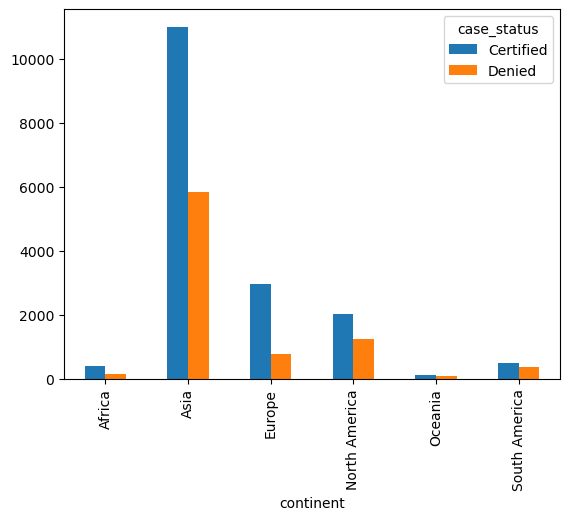

In [19]:
result1.plot(kind="bar")

<AxesSubplot:xlabel='case_status'>

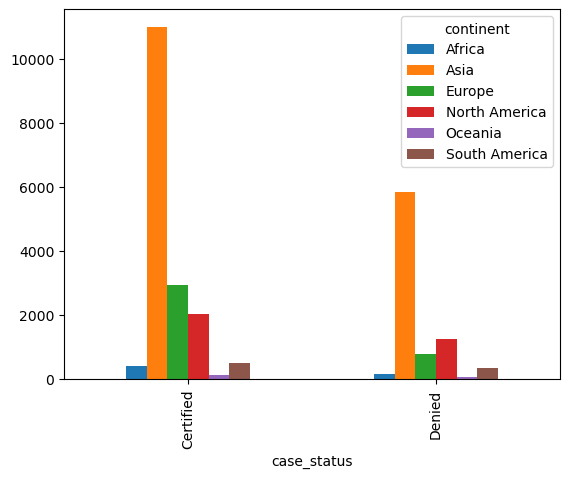

In [20]:
result2.plot(kind="bar")

In [21]:
col1=df['continent']
col2=df['case_status']
col3=df['education_of_employee']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

education_of_employee      Bachelor's  Doctorate  High School  Master's
continent     case_status                                              
Africa        Certified            81         43           23       250
              Denied               62         11           43        38
Asia          Certified          4407        780          676      5149
              Denied             2761        143         1614      1331
Europe        Certified          1040        788          162       967
              Denied              259         58          328       130
North America Certified           641        207          210       979
              Denied              584         51          191       429
Oceania       Certified            38         19           19        46
              Denied               28          3           17        22
South America Certified           160         75           74       184
              Denied              173         14           63       109

In [22]:
col1=df['continent']
col2=df['case_status']
col3=df['education_of_employee']
col=[col3,col2]
result4=pd.crosstab(col,col1)
result4

continent                          Africa  Asia  Europe  North America  \
education_of_employee case_status                                        
Bachelor's            Certified        81  4407    1040            641   
                      Denied           62  2761     259            584   
Doctorate             Certified        43   780     788            207   
                      Denied           11   143      58             51   
High School           Certified        23   676     162            210   
                      Denied           43  1614     328            191   
Master's              Certified       250  5149     967            979   
                      Denied           38  1331     130            429   

continent                          Oceania  South America  
education_of_employee case_status                          
Bachelor's            Certified         38            160  
                      Denied            28            173  
Doctorate             Certified         19             75  
                      Denied             3             14  
High School           Certified         19             74  
                      Denied            17             63  
Master's              Certified         46            184  
                      Denied            22            109

<AxesSubplot:xlabel='continent,case_status'>

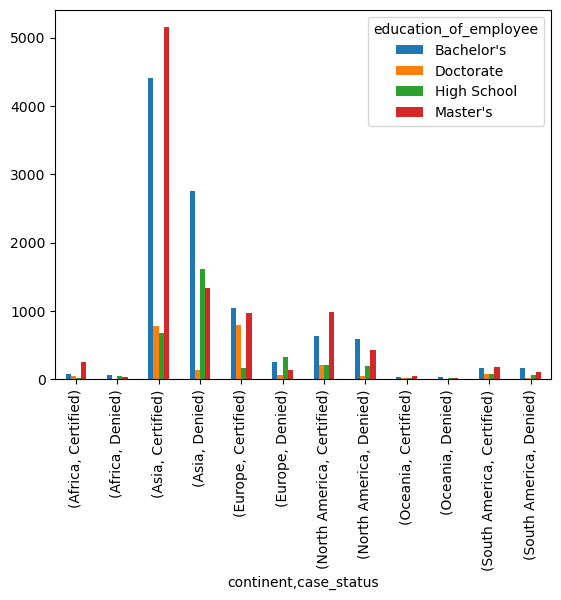

In [23]:
result3.plot(kind="bar")

<AxesSubplot:xlabel='education_of_employee,case_status'>

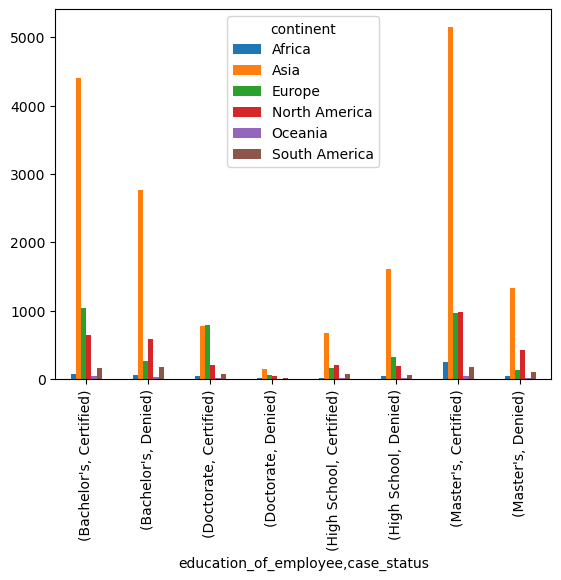

In [24]:
result4.plot(kind="bar")

# **Numerical vs Numerical**

 - In order to plot numerical vs numerical we need to use scatter plots

- Scatter plots will give the relation between two numeical columns

- It is under matplotlib

- plt.scatter

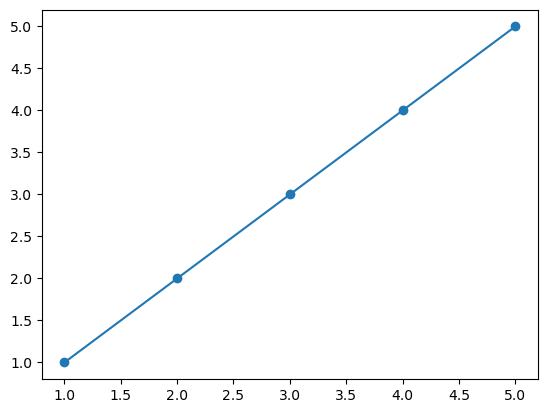

In [25]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [26]:
x=[i for i in range(-1,4)]
y=[i*i for i in x]
    
plt.scax=tter(x,y)
plt.plot(x,y)
plt.show()

NameError: name 'tter' is not defined

 **Scatter-plot-1**

- prevailing_wage and no_of_employees

In [ ]:
col1=df['prevailing_wage']
col2=df['no_of_employees']
plt.scatter(col1,col2)

plt.show()

In [ ]:
col1=df['yr_of_estab']
col2=df['no_of_employees']
plt.scatter(col1,col2)

plt.show()

In [ ]:
col1=df['yr_of_estab']
col2=df['prevailing_wage']
plt.scatter(col1,col2)

plt.show()

In [ ]:
# **Observation**:No relation

<img src="https://qph.cf2.quoracdn.net/main-qimg-8b7cfb2dfcd459f25c9d7641aacc82ab-pjlq" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 602px; height: 157px; margin: 0.5px 0px; width: 351px;" alt="What is the reasoning and meaning of the Pearson correlation coefficient?  How did that formula come to be? - Quora" jsname="kn3ccd" aria-hidden="false">

**how to paste image in jupyter notebook**

- open image in browser

- click on image and then click inspect

- then it will show image location

- then select edit as html option

- then at cursor position ctr+A and then ctrl+C

- open jupyter notebook and paste it in cell

- esc+M and then run the cell

**pearson correlation coefficient will give the amount of relation between variables**

- It is denoted with r

- r varies from -1 to 1

- For positive relation r varies from 0 to 1

- For negative relation r varies from -1 to 0

- For no relation r approximate 0

- In python code we have **corr** function under pandas

- This will give covariance matrix
    
- we already discussed covariance matrix is rows and columns type
 
- In this data we have 3 numerical columns
  
- so we will get 3*3 9 values

- All trace of the matrix represents variance
    
    - Upper triangle and lower triangle represents co variance

In [27]:
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


# **Observations**

- The correlation between no_of_employees and yr_of_establishment is approx 0

- which indicates no relation

- The correlation between no_of_employees and prevailing_wage is approx 0

- which indicates no relation

- The correlation between prevailing_wage and yr_of_establishment is approx 0

- which indicates no relation

**What happen if correlation is high**

- for that we will read wine quality dataset

- will perform the corr

In [29]:
wine_df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\FSDS 7\EDA_PYTHON\winequality_red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [31]:
wine_df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
wine_df=wine_df.drop_duplicates()
wine_df.iloc[1:,:]
#If you see first row NAN 
#indexes are not in the order
#you need to work on this later

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
len(df.columns)

12

In [38]:
#correlation 
# 12*12=144
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heatmap**

- heat map will provide the matrix representation of correlation value

- heat map reperesents values in color format

- different value in different color bar

- beside matrix it will display color bar

- color bar means scale of value with color

- it is a seaborn package

<AxesSubplot:>

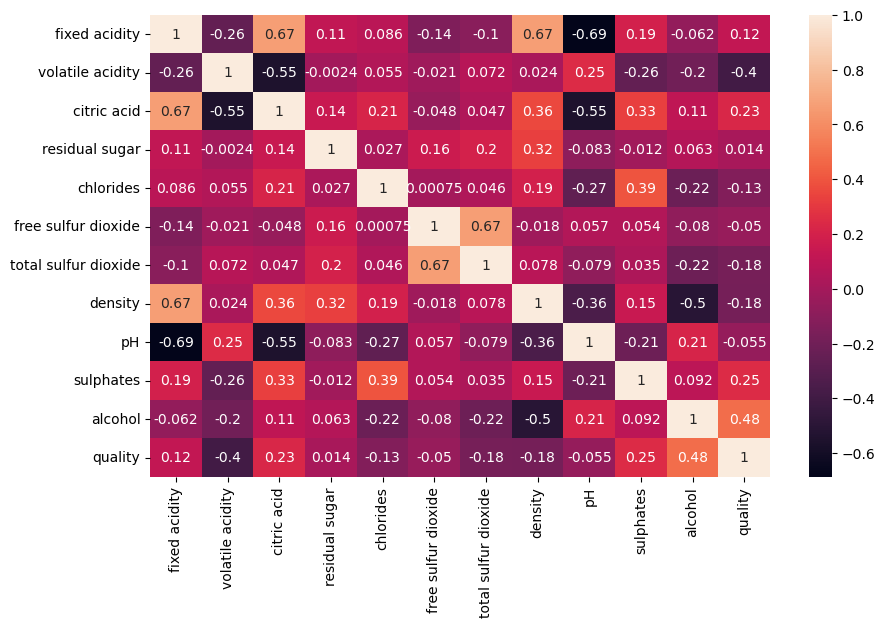

In [46]:
wine_corr=wine_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

<AxesSubplot:>

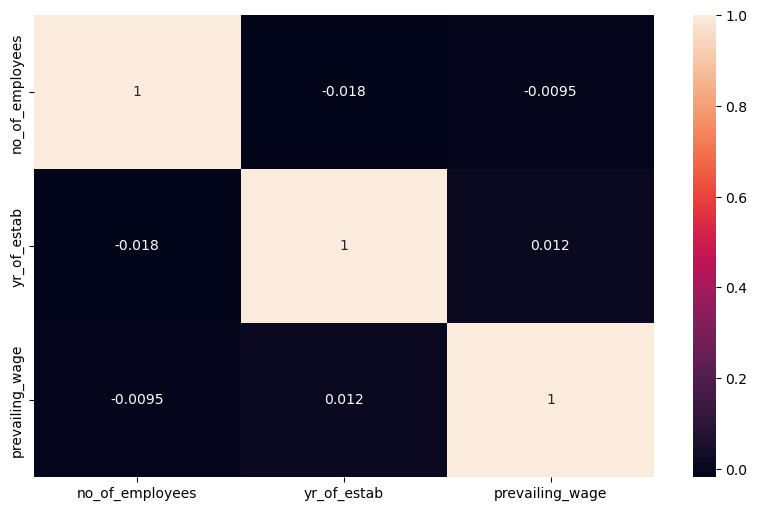

In [49]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

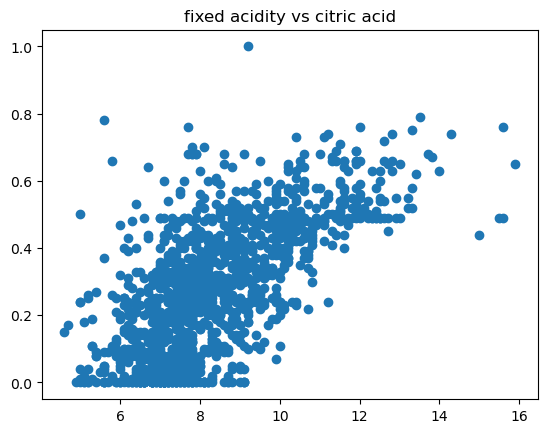

In [52]:
x=wine_df['fixed acidity']
y=wine_df['citric acid']
plt.title("fixed acidity vs citric acid")
plt.scatter(x,y)

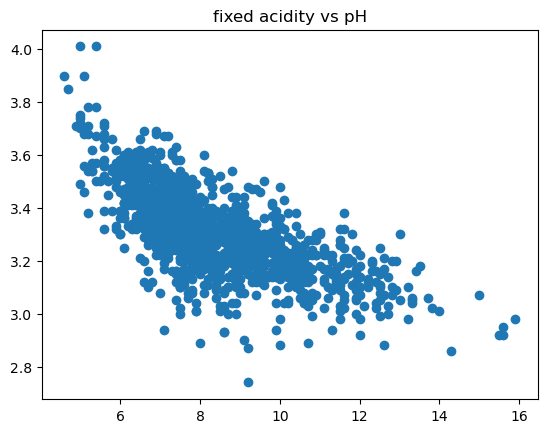

In [53]:
x=wine_df['fixed acidity']
y=wine_df['pH']
plt.title("fixed acidity vs pH")
plt.scatter(x,y)

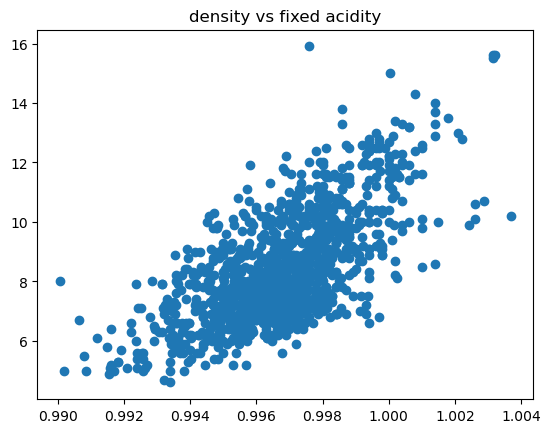

In [57]:
x=wine_df['density']
y=wine_df['fixed acidity']
plt.title("density vs fixed acidity")
plt.scatter(x,y)

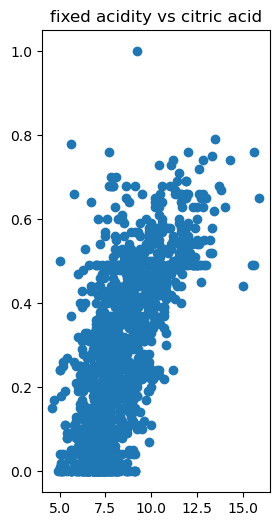

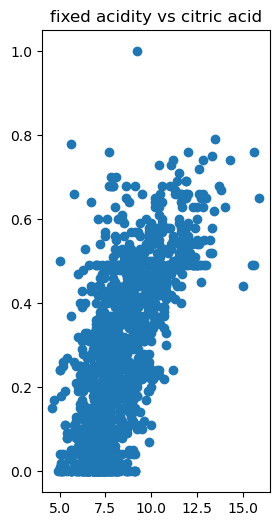

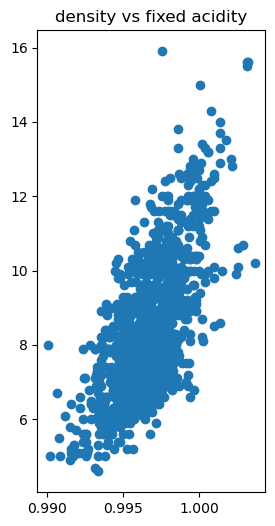

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
x=wine_df['fixed acidity']
y=wine_df['citric acid']
plt.title("fixed acidity vs citric acid")
plt.scatter(x,y)

plt.figure(figsize=(10,6))
plt.subplot(1,3,2)
x=wine_df['fixed acidity']
y=wine_df['citric acid']
plt.title("fixed acidity vs citric acid")
plt.scatter(x,y)

plt.figure(figsize=(10,6))
plt.subplot(1,3,3)
x=wine_df['density']
y=wine_df['fixed acidity']
plt.title("density vs fixed acidity")
plt.scatter(x,y)
plt.show()